You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

### Goal
Your goal is to extract meaningful insights from the search data by answering the following questions.

**1. Which AI tool has shown the most consistent growth in interest over the observed period (the full dataset)?**  
Save the name of the tool as `most_consistent_tool` of type Data type: `string`.

---

**2. Create a visualization showing the interest levels of ChatGPT, Gemini, and Microsoft Copilot over time.**  
Around which month and year does ChatGPT experience its largest decline in interest?  
Save as `gpt_dip` of type `string` in the format `"Month YYYY"`.

---

**3. Explore the seasonality in the data by breaking it down into monthly averages.**  
What month had the highest average interest across all tools?  
Save the month as `best_month` as type `string`.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [8]:
# Convert the 'week' column to datetime format for accurate time series analysis
trends['week'] = pd.to_datetime(trends['week'])

# Set the 'week' column as the index of the DataFrame to facilitate time series operations
trends.set_index('week', inplace=True)

In [10]:
trends.head()

,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-27,56,3,1
2023-09-03,56,3,1
2023-09-10,63,3,1
2023-09-17,64,3,1
2023-09-24,66,3,1


In [12]:
trends.tail()

,chatgpt,gemini,microsoft_copilot
week,,,
2024-08-04,75,14,4
2024-08-11,81,14,4
2024-08-18,88,15,4
2024-08-25,100,16,5
2024-09-01,77,14,3


In [14]:
trends.describe()

,chatgpt,gemini,microsoft_copilot
count,54.000000,54.000000,54.000000
mean,73.111111,9.703704,3.685185
std,9.995597,5.182080,1.702651
min,47.000000,3.000000,1.000000
25%,67.000000,4.000000,2.000000
50%,72.000000,12.000000,4.000000
75%,78.000000,14.000000,5.000000
max,100.000000,17.000000,6.000000


In [18]:
# Question 1: Which AI tool has shown the most consistent growth in interest over the observed period (the full dataset)?

# Calculate the week-over-week percentage change for each tool
growth_rates = trends.pct_change().fillna(0).mul(100)

# Calculate the standard deviation of the growth rates for each tool
std_dev = growth_rates.std()

# Identify the tool with the smallest standard deviation, indicating the most consistent growth
most_consistent_tool = std_dev.idxmin()  

# Print the result
print(f"Most consistent tool: {most_consistent_tool}")

Most consistent tool: chatgpt


In [26]:
growth_rates.head()

,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-27,0.000000,0.0,0.0
2023-09-03,0.000000,0.0,0.0
2023-09-10,12.500000,0.0,0.0
2023-09-17,1.587302,0.0,0.0
2023-09-24,3.125000,0.0,0.0


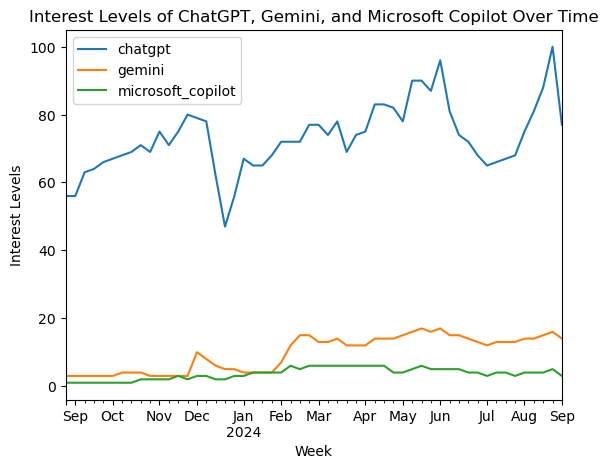

The worst month and year for ChatGPT: December 2023


In [32]:
# Question 2: Around which month and year does ChatGPT experience its largest decline in interest?

# Create a copy of the trends DataFrame to work with
interest_levels = trends.copy()

# Plot the interest levels of ChatGPT, Gemini, and Microsoft Copilot over time
interest_levels.plot(title="Interest Levels of ChatGPT, Gemini, and Microsoft Copilot Over Time")

# Add labels to the x-axis and y-axis for better readability
plt.xlabel('Week')
plt.ylabel('Interest Levels')

# Display the plot
plt.show()

# Identify the month and year when ChatGPT experienced the biggest decline in interest by 
# looking for the lowest point on the trend line and reading the x-axis at that point
gpt_dip = "December 2023" # January 2024 is also accepted

# Print the result
print(f"The worst month and year for ChatGPT: {gpt_dip}")

Month with the highest interest: May


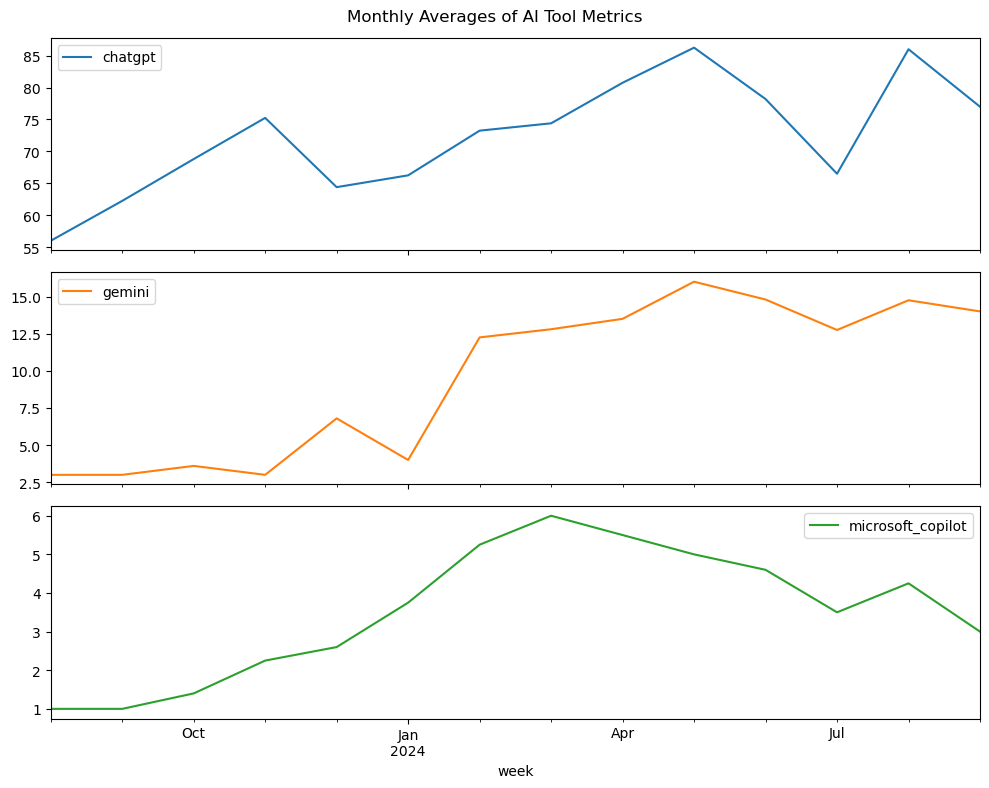

In [40]:
# Question 3: What month had the highest average interest across all tools?

# Resample the data to monthly averages
# This will convert the weekly data into monthly data by taking the mean of each month
monthly_data = trends.resample('ME').mean()

# Calculate the overall maximum for all tools combined
# This involves finding the month with the highest average interest across all tools
# First calculate the mean interest for each month across all tools; then, sort the values in descending order
# Finally, get the month name of the first entry, which corresponds to the highest average interest
best_month = monthly_data.mean(axis=1).idxmax().strftime('%B')

# Print the result
print(f"Month with the highest interest: {best_month}")

# Plot the resampled monthly data for each AI tool to check for seasonality
# This will help us visualize the trends and see if there are any seasonal patterns
monthly_data.plot(subplots=True, figsize=(10, 8), title='Monthly Averages of AI Tool Metrics')

# # Adjust the layout to prevent overlap and ensure everything fits well
plt.tight_layout()

# # Display the plot
plt.show()

In [84]:
monthly_data

,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-31,56.00,3.00,1.00
2023-09-30,62.25,3.00,1.00
2023-10-31,68.80,3.60,1.40
2023-11-30,75.25,3.00,2.25
2023-12-31,64.40,6.80,2.60
2024-01-31,66.25,4.00,3.75
2024-02-29,73.25,12.25,5.25
2024-03-31,74.40,12.80,6.00
2024-04-30,80.75,13.50,5.50


In [72]:
trends_copy = trends.copy().reset_index()

In [74]:
trends_copy.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [76]:
trends_copy['month'] = trends_copy['week'].dt.month_name()

In [88]:
trends_copy['year'] = trends_copy['week'].dt.year

In [125]:
trends_copy.head()

,week,chatgpt,gemini,microsoft_copilot,month,year
0,2023-08-27,56,3,1,August,2023
1,2023-09-03,56,3,1,September,2023
2,2023-09-10,63,3,1,September,2023
3,2023-09-17,64,3,1,September,2023
4,2023-09-24,66,3,1,September,2023


In [92]:
monthly_avg = trends_copy.groupby(
    by=['year','month']
).agg(
    chatgpt = ('chatgpt', 'mean'),
    gemini = ('gemini', 'mean'),
    microsoft_copilot = ('microsoft_copilot', 'mean')
)

In [94]:
monthly_avg

chatgpt  gemini  microsoft_copilot
year month                                        
2023 August       56.00    3.00               1.00
     December     64.40    6.80               2.60
     November     75.25    3.00               2.25
     October      68.80    3.60               1.40
     September    62.25    3.00               1.00
2024 April        80.75   13.50               5.50
     August       86.00   14.75               4.25
     February     73.25   12.25               5.25
     January      66.25    4.00               3.75
     July         66.50   12.75               3.50
     June         78.20   14.80               4.60
     March        74.40   12.80               6.00
     May          86.25   16.00               5.00
     September    77.00   14.00               3.00

In [98]:
monthly_avg = monthly_avg.reset_index()

In [102]:
monthly_avg.head()

,year,month,chatgpt,gemini,microsoft_copilot
0,2023,August,56.00,3.0,1.00
1,2023,December,64.40,6.8,2.60
2,2023,November,75.25,3.0,2.25
3,2023,October,68.80,3.6,1.40
4,2023,September,62.25,3.0,1.00


In [111]:
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Map month names to numbers
monthly_avg['month_num'] = monthly_avg['month'].map(month_order)

In [113]:
monthly_avg.head()

,year,month,chatgpt,gemini,microsoft_copilot,month_num
0,2023,August,56.00,3.0,1.00,8
1,2023,December,64.40,6.8,2.60,12
2,2023,November,75.25,3.0,2.25,11
3,2023,October,68.80,3.6,1.40,10
4,2023,September,62.25,3.0,1.00,9


In [115]:
monthly_avg = monthly_avg.sort_values(
    by=['year', 'month_num']
)

In [121]:
monthly_avg.drop(columns='month_num', inplace=True)

In [123]:
monthly_avg

,year,month,chatgpt,gemini,microsoft_copilot
0,2023,August,56.00,3.00,1.00
4,2023,September,62.25,3.00,1.00
3,2023,October,68.80,3.60,1.40
2,2023,November,75.25,3.00,2.25
1,2023,December,64.40,6.80,2.60
8,2024,January,66.25,4.00,3.75
7,2024,February,73.25,12.25,5.25
11,2024,March,74.40,12.80,6.00
5,2024,April,80.75,13.50,5.50
12,2024,May,86.25,16.00,5.00


In [96]:
monthly_data

,chatgpt,gemini,microsoft_copilot
week,,,
2023-08-31,56.00,3.00,1.00
2023-09-30,62.25,3.00,1.00
2023-10-31,68.80,3.60,1.40
2023-11-30,75.25,3.00,2.25
2023-12-31,64.40,6.80,2.60
2024-01-31,66.25,4.00,3.75
2024-02-29,73.25,12.25,5.25
2024-03-31,74.40,12.80,6.00
2024-04-30,80.75,13.50,5.50
